# 1- Exploring Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# Loading dataset
path = 'D:/Datasets/flood dataset - kaggle/flood prediction/datasets_1686_3183_rainfall in india 1901-2015.csv'
data = pd.read_csv(path, na_values = ['na', '--'])
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [3]:
# Filling NULL with mean of each values of column, because nun values will cause error in the following way
data['JAN'].fillna((data['JAN'].mean()), inplace=True)
data['FEB'].fillna((data['FEB'].mean()), inplace=True)
data['MAR'].fillna((data['MAR'].mean()), inplace=True)
data['APR'].fillna((data['APR'].mean()), inplace=True)
data['MAY'].fillna((data['MAY'].mean()), inplace=True)
data['JUN'].fillna((data['JUN'].mean()), inplace=True)
data['JUL'].fillna((data['JUL'].mean()), inplace=True)
data['AUG'].fillna((data['AUG'].mean()), inplace=True)
data['SEP'].fillna((data['SEP'].mean()), inplace=True)
data['OCT'].fillna((data['OCT'].mean()), inplace=True)
data['DEC'].fillna((data['DEC'].mean()), inplace=True)

## To prepare dataset for timeseries forecasting

In [4]:
# Here, each month has been separated into a column with its value
df_month = pd.DataFrame(data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL','AUG', 'SEP', 'OCT']])
df_month = df_month.T
df_month = df_month.unstack(level=0)
df_month = df_month.reset_index()
print(df_month)

# Creation of year/month in a separate column
df_time = pd.Series(pd.period_range(start='1901', end='2016', freq='M', periods=None), dtype=str)
df_time = df_time.reset_index()
print(df_time)

# To create a new datafarame which record the values of rainfall in the specific year and moth
df = pd.DataFrame({'Month':df_time[0],
                  'Rainfall':df_month[0]})
display(df.head())
display(df.dtypes)

       level_0 level_1      0
0            0     JAN   49.2
1            0     FEB   87.1
2            0     MAR   29.2
3            0     APR    2.3
4            0     MAY  528.8
...        ...     ...    ...
41155     4115     JUN  296.6
41156     4115     JUL  257.5
41157     4115     AUG  146.4
41158     4115     SEP  160.4
41159     4115     OCT  165.4

[41160 rows x 3 columns]
      index        0
0         0  1901-01
1         1  1901-02
2         2  1901-03
3         3  1901-04
4         4  1901-05
...     ...      ...
1376   1376  2015-09
1377   1377  2015-10
1378   1378  2015-11
1379   1379  2015-12
1380   1380  2016-01

[1381 rows x 2 columns]


,Month,Rainfall
0,1901-01,49.2
1,1901-02,87.1
2,1901-03,29.2
3,1901-04,2.3
4,1901-05,528.8


Month        object
Rainfall    float64
dtype: object

In [5]:
# Month values are object, so we should change it as to_datetime pandas format
df['Month'] = pd.to_datetime(df['Month'])
print(df.head())
print(df.dtypes)

# Here, we replace the index number with datatime (Month column)
df.set_index('Month', inplace=True)
df.head()

       Month  Rainfall
0 1901-01-01      49.2
1 1901-02-01      87.1
2 1901-03-01      29.2
3 1901-04-01       2.3
4 1901-05-01     528.8
Month       datetime64[ns]
Rainfall           float64
dtype: object


,Rainfall
Month,
1901-01-01,49.2
1901-02-01,87.1
1901-03-01,29.2
1901-04-01,2.3
1901-05-01,528.8


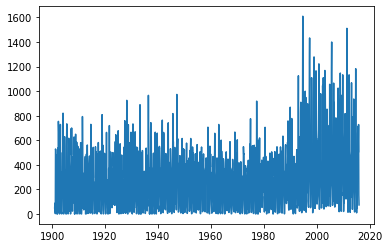

In [6]:
# To plot raining values
plt.plot(df['Rainfall'])
plt.show()

The data is going up and coming down so taht's probabley the seasonality is reflecting
not stationary that means there are ups and downs over the period shown

# Various flavors of ARIMA Model

ARIMA: Non-seasonal Autoregressive Integrated Moving Averages

SARIMA: Seasonal ARIMA
    
SARIMAX: Seasonal ARIMA with exogenous variables

In [7]:
# To determine is the data stationary or not
# Stationary means independ on seasonal data and need ARIMA
# Not stationary means depend on seasonal data and need SARIMA 
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha=0.05)
adf_test.should_diff(df)

(0.01, False)

In [8]:
# Dickey-Fuller test : this is similart to t-test
from statsmodels.tsa.stattools import adfuller
adf, pvalue, usedlag_, nobs_, critical_values, icbest_ = adfuller(df)
print("pvalue = ", pvalue, "if above 0.05, data is not stationary")

pvalue =  6.6207417883846186e-06 if above 0.05, data is not stationary


In [9]:
# Here we add a cloumn called 'year' to see how the number is changing because it make it easy to plot
#df['year'] = [d.year for d in df.index]
# Here we split each month of year as a separte column
#df['month'] = [d.strftime('%B') for d in df.index]
#years = df['year'].unique()

# To create a new datafarame which record the values of rainfall in the specific year and moth
df_new = pd.DataFrame({'Year':df_time[0],
                   'Month':df_month['level_1'],
                   'Rainfall':df_month[0]})

years = df_new['Year'].unique()
display(df_new.head())
display(df_new.dtypes)

,Year,Month,Rainfall
0,1901-01,JAN,49.2
1,1901-02,FEB,87.1
2,1901-03,MAR,29.2
3,1901-04,APR,2.3
4,1901-05,MAY,528.8


Year         object
Month        object
Rainfall    float64
dtype: object

<AxesSubplot:xlabel='Month', ylabel='Rainfall'>

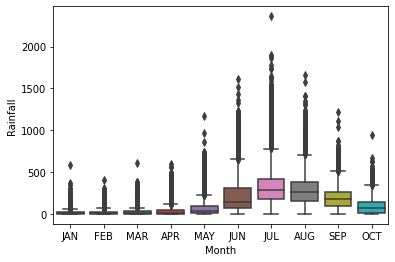

In [10]:
# Plot yearly and monthly values as boxplot
#sns.boxplot(x='Year', y='Rainfall', data=df_new)
sns.boxplot(x='Month', y='Rainfall', data=df_new)

To see more details about this part, visit the website:
    
https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/

In [11]:
# Extract and plot trend, seasonal and residuals
from statsmodels.tsa.seasonal import seasonal_decompose
decomposed = seasonal_decompose(df_new['Rainfall'], 
                                period = 1,
                               model='additive')

#Additive time series:
#Value = Base Level + Trend + Seasonality + Error
#Multiplicative Time Series:
#Value = Base Level x Trend x Seasonality x Error

In [12]:
trend = decomposed.trend
seasonal = decomposed.seasonal   #decomposed give you seasonal information
residual = decomposed.resid

print(trend)
print(seasonal)
print(residual)

0         49.2
1         87.1
2         29.2
3          2.3
4        528.8
         ...  
41155    296.6
41156    257.5
41157    146.4
41158    160.4
41159    165.4
Name: trend, Length: 41160, dtype: float64
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
41155    0.0
41156    0.0
41157    0.0
41158    0.0
41159    0.0
Name: seasonal, Length: 41160, dtype: float64
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
41155    0.0
41156    0.0
41157    0.0
41158    0.0
41159    0.0
Name: resid, Length: 41160, dtype: float64


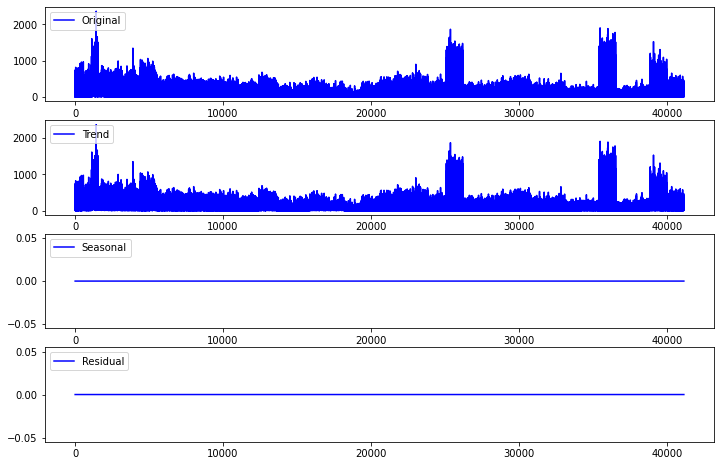

In [13]:
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(df_new['Rainfall'], label='Original', color='blue')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal', color='blue')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residual', color='blue')
plt.legend(loc='upper left')
plt.show()

C:\Users\VHD\anaconda3\envs\SI\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


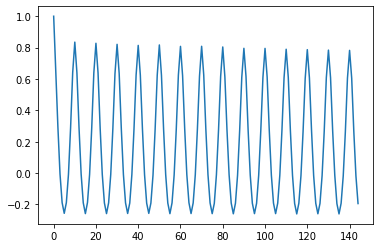

In [14]:
#AUTOCORRELATION
#Autocorrelation is simply the correlation of a series with its own lags.
# Plot lag on x axis and correlation on y axis
#Any correlation above confidence lnes are statistically significant.

from statsmodels.tsa.stattools import acf
acf_144 = acf(df_new.Rainfall, nlags=144)
plt.plot(acf_144)
plt.show()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

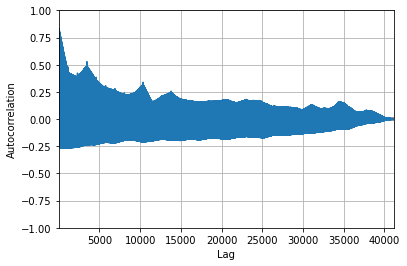

In [15]:
#Obtain the same but with single line and more info..
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_new.Rainfall)

Here, using pandas plotting, that horizontal bands indicate 95% and 99% (dashed) confidence bands, we can clearly anything above this we are highly confident that any lags below 5000(mm), it is all positively correlated and it is above 99 confidence level. So any lag before 5000 mm in this data set (that is monthly), it is a strong positive correlation which is useful information to apply forecasting